# Import module

In [47]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from pathlib import Path
import matplotlib.patches as mpatches
font_path = Path('./NanumGothic.otf')
fontprop = fm.FontProperties(fname=font_path, size=10)

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from geopy.distance import geodesic
from plotnine import *

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Make dataframe

In [4]:
bike_path='data/'
bike_list=os.listdir(bike_path)
df=[]
for file in bike_list:
    file_path=os.path.join(bike_path,file)
    file_name='bike_'+file_path.split('.')[0][-4:]
    file_name=pd.read_csv(file_path,low_memory=False)
    df.append(file_name)

In [6]:
weather_path='weather/'
weather_list=os.listdir(weather_path)
weather_df=[]
for file in weather_list:
    file_path=os.path.join(weather_path,file)
    file_name='weather_'+file_path.split('.')[0][-4:]
    file_name=pd.read_excel(file_path)
    weather_df.append(file_name)

In [10]:
for i in range(5):
    print(weather_df[i].isna().sum())

# bike_df.isnull().sum()

지점            0
지점명           0
일시            0
기온(°C)        0
강수량(mm)    7811
적설(cm)     8381
시정(10m)       0
dtype: int64
지점            0
지점명           0
일시            0
기온(°C)        0
강수량(mm)    4012
적설(cm)     4204
시정(10m)       0
dtype: int64
지점            0
지점명           0
일시            0
기온(°C)        0
강수량(mm)    7937
적설(cm)     8678
시정(10m)       0
dtype: int64
지점            0
지점명           0
일시            0
기온(°C)        1
강수량(mm)    7723
적설(cm)     8576
시정(10m)       0
dtype: int64
지점            0
지점명           0
일시            0
기온(°C)        1
강수량(mm)    7854
적설(cm)     8472
시정(10m)       0
dtype: int64


In [19]:
df[2].columns

Index(['대여일시', '대여대여소', '대여대여소이름', '대여거치대', '반납일시', '반납대여소', '반납대여소이름',
       '반납거치대', '이용시간', '이용거리'],
      dtype='object')

In [20]:
df[2]["대여연월"] = df[2]["대여일시"].apply(lambda x : x[:7])
df[2]["반납연월"] = df[2]["반납일시"].apply(lambda x : x[:7])


In [28]:
df[2]["대여일시"]=pd.to_datetime(df[2]["대여일시"])
df[2]["반납일시"]=pd.to_datetime(df[2]["반납일시"])

In [24]:
df[2]["대여연도"] = df[2]["대여일시"].dt.year
df[2]["대여월"] = df[2]["대여일시"].dt.month
df[2]["대여일"] = df[2]["대여일시"].dt.day
df[2]["대여시간"] = df[2]["대여일시"].dt.hour
df[2]["대여요일"] = df[2]["대여일시"].dt.dayofweek
df[2]["대여일자"] = df[2]["대여일시"].dt.date

In [25]:
df[2].sample()

,대여일시,대여대여소,대여대여소이름,대여거치대,반납일시,반납대여소,반납대여소이름,반납거치대,이용시간,이용거리,대여연월,반납연월,대여연도,대여월,대여일,대여시간,대여요일,대여일자
12679777,2020-07-31 08:02:48,3219,영등포역 2번출구,0,2020-07-31 08:17:06,209,유진투자증권빌딩 앞,0,14,0.0,2020-07,2020-07,2020,7,31,8,4,2020-07-31


In [29]:
df[2]["반납연도"] = df[2]["반납일시"].dt.year
df[2]["반납월"] = df[2]["반납일시"].dt.month
df[2]["반납일"] = df[2]["반납일시"].dt.day
df[2]["반납시간"] = df[2]["반납일시"].dt.hour
df[2]["반납요일"] = df[2]["반납일시"].dt.dayofweek
df[2]["반납일자"] = df[2]["반납일시"].dt.date

df[2].sample()

,대여일시,대여대여소,대여대여소이름,대여거치대,반납일시,반납대여소,반납대여소이름,반납거치대,이용시간,이용거리,...,대여일,대여시간,대여요일,대여일자,반납연도,반납월,반납일,반납시간,반납요일,반납일자
19756520,2020-10-28 00:28:05,158,독립문 어린이 공원,0,2020-10-28 00:34:34,198,충정2교,0,6,0.0,...,28,0,2,2020-10-28,2020,10,28,0,2,2020-10-28


<AxesSubplot:xlabel='대여월', ylabel='count'>

/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from c

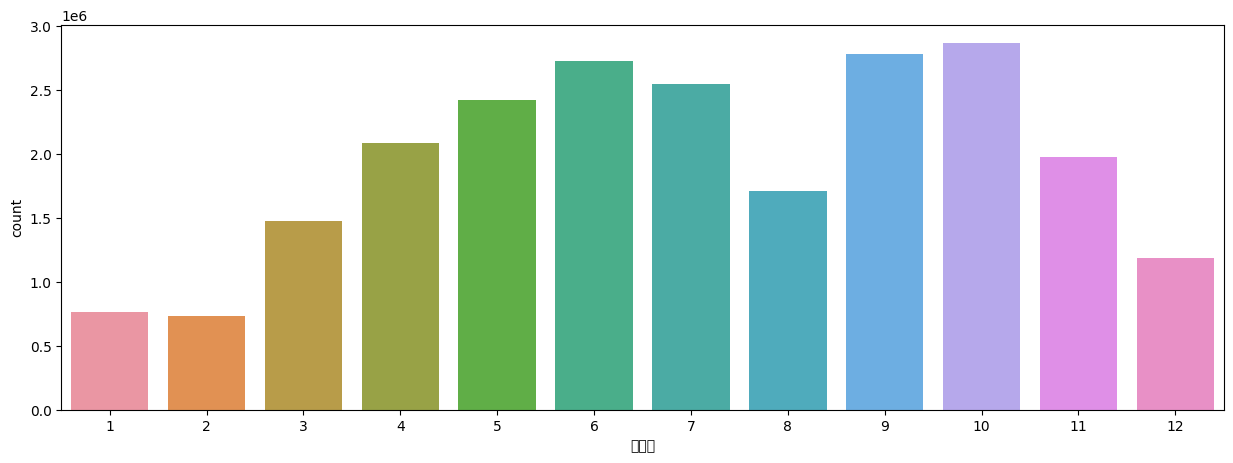

In [31]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df[2], x="대여월")

In [32]:
df_rent_group = df[2].groupby(["대여일자", "대여연월", "대여연도", "대여월", "대여일", "대여요일"])["대여일시"].count()
df_rent_group.head()

대여일자        대여연월     대여연도  대여월  대여일  대여요일
2020-01-01  2020-01  2020  1    1    2       15697
2020-01-02  2020-01  2020  1    2    3       27841
2020-01-03  2020-01  2020  1    3    4       29654
2020-01-04  2020-01  2020  1    4    5       24707
2020-01-05  2020-01  2020  1    5    6       22391
Name: 대여일시, dtype: int64

In [33]:
df_rent = pd.DataFrame(df_rent_group).reset_index()
df_rent.columns = ["대여일자", "대여연월", "대여연도", 
                   "대여월", "대여일", "대여요일", "대여수"]
df_rent.head()

,대여일자,대여연월,대여연도,대여월,대여일,대여요일,대여수
0,2020-01-01,2020-01,2020,1,1,2,15697
1,2020-01-02,2020-01,2020,1,2,3,27841
2,2020-01-03,2020-01,2020,1,3,4,29654
3,2020-01-04,2020-01,2020,1,4,5,24707
4,2020-01-05,2020-01,2020,1,5,6,22391


array([[<AxesSubplot:title={'center':'대여일시'}>,
        <AxesSubplot:title={'center':'대여대여소'}>,
        <AxesSubplot:title={'center':'대여거치대'}>,
        <AxesSubplot:title={'center':'반납일시'}>],
       [<AxesSubplot:title={'center':'반납대여소'}>,
        <AxesSubplot:title={'center':'반납거치대'}>,
        <AxesSubplot:title={'center':'이용시간'}>,
        <AxesSubplot:title={'center':'이용거리'}>],
       [<AxesSubplot:title={'center':'대여연도'}>,
        <AxesSubplot:title={'center':'대여월'}>,
        <AxesSubplot:title={'center':'대여일'}>,
        <AxesSubplot:title={'center':'대여시간'}>],
       [<AxesSubplot:title={'center':'대여요일'}>,
        <AxesSubplot:title={'center':'반납연도'}>,
        <AxesSubplot:title={'center':'반납월'}>,
        <AxesSubplot:title={'center':'반납일'}>],
       [<AxesSubplot:title={'center':'반납시간'}>,
        <AxesSubplot:title={'center':'반납요일'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
/home/d

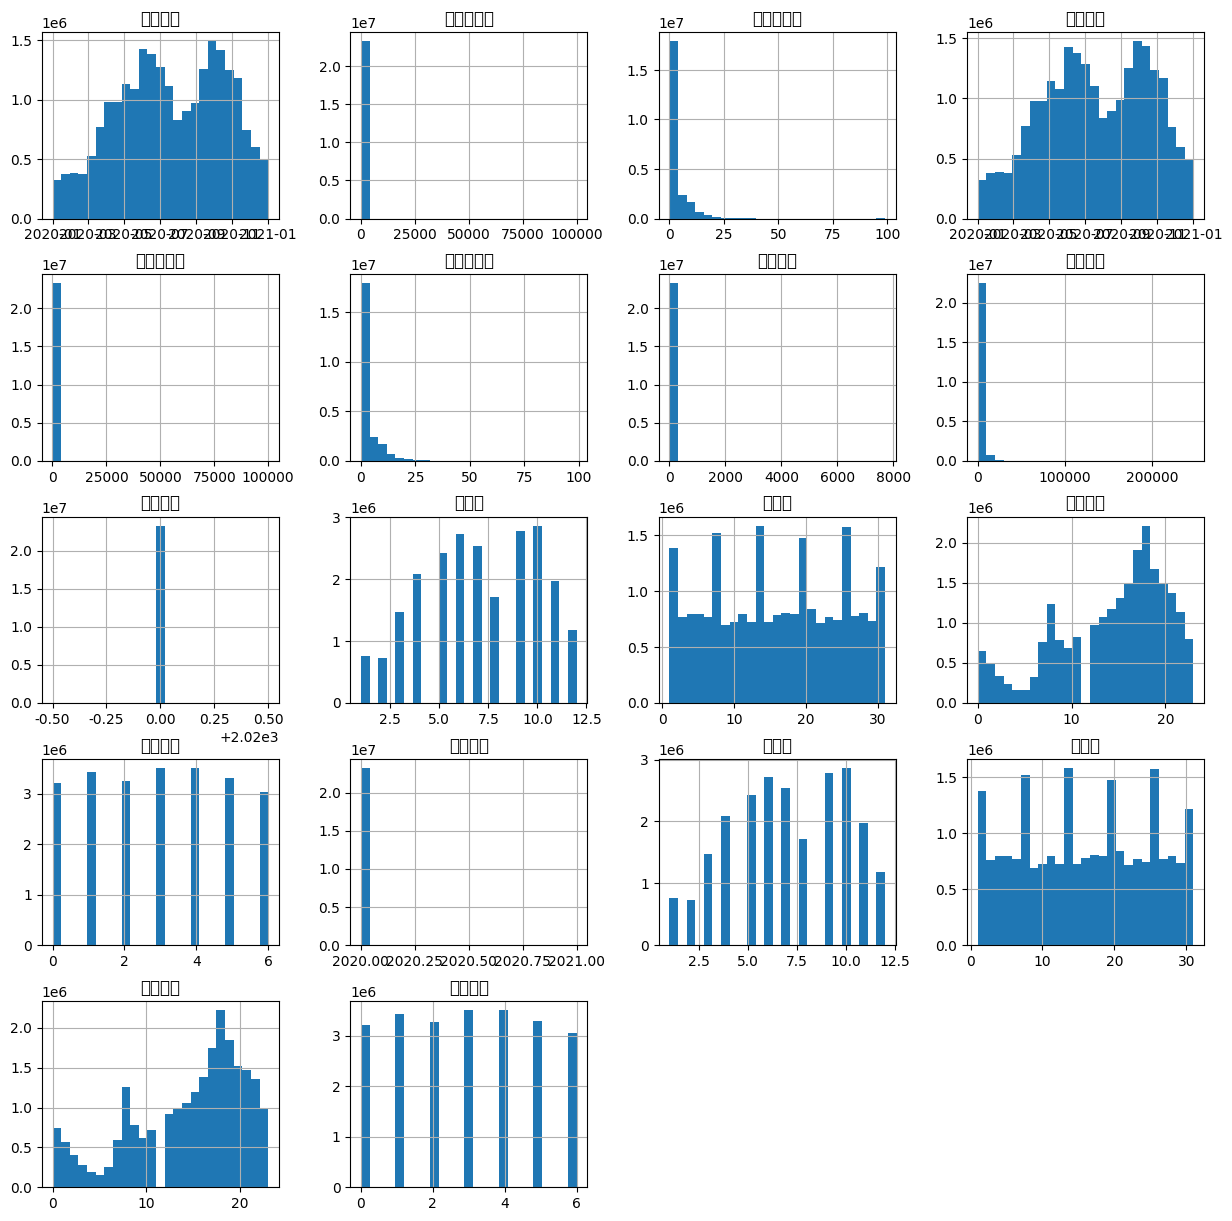

In [44]:
df[2].hist(figsize = (15,15), bins=25)

<AxesSubplot:xlabel='대여일자'>

/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current fo

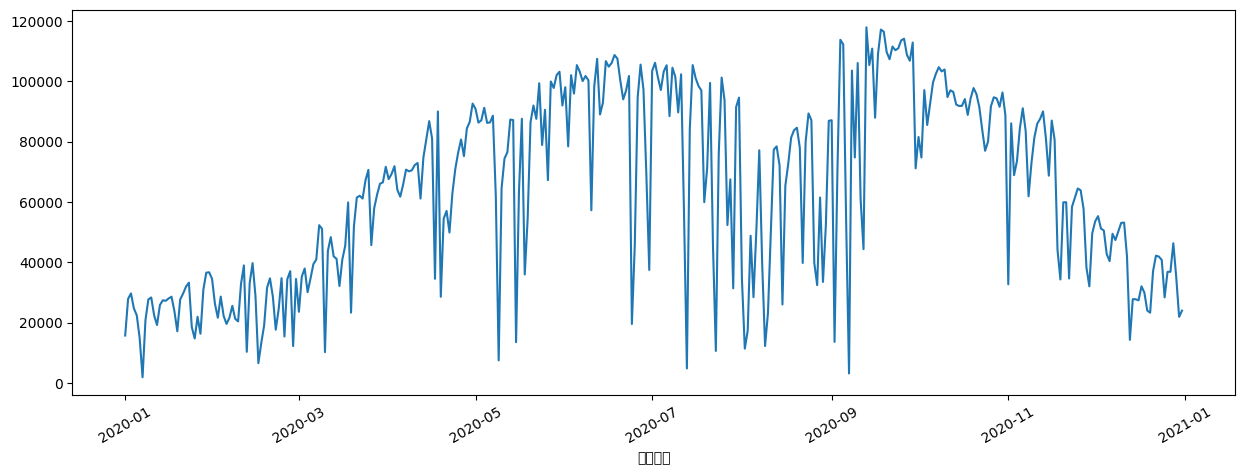

In [53]:
df_rent.groupby('대여일자')['대여수'].mean().plot(rot=30, figsize=(15, 5))